In [965]:
#!pip install EntropyHub

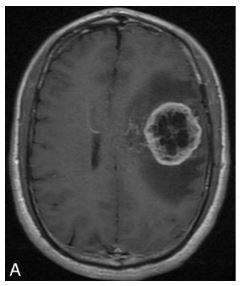

252

In [966]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from scipy import ndimage, misc
import skimage.measure    
import math

# read an image
img = np.matrix(Image.open("/content/Y89.JPG").convert('L'))
 
display(Image.fromarray(img))

img[0,0]

In [967]:
min_i = np.amin(img)
max_i = np.amax(img)

min_o = 0
max_o = 256

relative_input_range = (max_i - min_i) / 255
print(max_i, min_i)

255 0


In [968]:
def fitness(lut):
  cur = np.matrix(lut[img]).astype(int)
  fit = (np.matrix.std(cur) * skimage.measure.shannon_entropy(cur) * np.mean(np.absolute(ndimage.sobel(cur)))) ** (1/3)
  
  return [cur, fit]

In [969]:
img
it = 100
sa_disable = False
ga_disable = True
aco_disable = False

best_fit = 0
pheromone_map = np.zeros((256, 256))
gene_fit = np.arange(10) * 0
gene_best = np.arange(10) * 0
it_until_GA = 0
GA_best_fit = 0
enhancement_lut = np.arange(256) * 0
pheromone_best_trace = np.zeros((256, 256))
fit_per_it = np.arange(it) * 0

last_part = 's'

temp = 200

best_chromosome = []


In [970]:
def add(ar, _from, step, to):
  for i in range(_from - 1, to, step):
    ar.append(i)
  return ar

sa_schedule = []
sa_schedule = add(sa_schedule, 10, 10, 40)
sa_schedule = add(sa_schedule, 46, 6, 70)
sa_schedule = add(sa_schedule, 73, 3, it)

sa_point_num = [2] * 4 + [4] * 5 + [6] * 10
sa_ant_num = [1] * 4 + [2] * 5 + [4] * 10
sa_duration = [3] * 4 + [6] * 5 + [12] * 10

ga_schedule = []
ga_schedule = add(ga_schedule, 5, 5, 25)
ga_schedule = add(ga_schedule, 31, 6, 55)
ga_schedule = add(ga_schedule, 62, 7, 90)

sa_interrupt_num = 0
ga_interrupt_num = 0

In [971]:
probability_factor_vector_up = np.arange(20) * 0
probability_factor_vector_right = np.arange(20) * 0
impact_factor_vector_alpha = np.arange(20) * 0
impact_factor_vector_beta = np.arange(20) * 0
routing_factor_vector = np.arange(20) * 0

for i in range(1,20,2):
  probability_factor_vector_up[i] = random.random() * 3
  probability_factor_vector_right[i] = random.random() * 3
  impact_factor_vector_alpha[i] = random.random() * 5
  impact_factor_vector_beta[i] = random.random() * 5
  routing_factor_vector[i] = random.randint(1, 150)

  probability_factor_vector_up[i - 1] = probability_factor_vector_up[i]
  probability_factor_vector_right[i - 1] = probability_factor_vector_right[i]
  impact_factor_vector_alpha[i - 1] = impact_factor_vector_alpha[i]
  impact_factor_vector_beta[i - 1] = impact_factor_vector_beta[i]
  routing_factor_vector[i - 1] = routing_factor_vector[i]


In [972]:
def SA(temp, enhancement_lut, best_fit, pheromone_trace_matrix,
       pheromone_best_trace, fitness_vector, lut_matrix, 
       sa_point_num, sa_ant_num, sa_duration, last_part):
  
  optimization_lut = enhancement_lut
  optimization_fitness = best_fit
  optimization_pheromone_trace = pheromone_best_trace
  selected_lut = -1

  lower_bound = 0

  for lut_num in range(sa_ant_num):
    last_point = min_i - 1

    if selected_lut != -1:
      optimization_lut = lut_matrix[selected_lut]
      optimization_fitness = fitness_vector[selected_lut]
      optimization_pheromone_trace = pheromone_trace_matrix[:,:,selected_lut]

    for point_num in range(sa_point_num):
      last_point += random.randint(1, max_i - sa_point_num + point_num - last_point)
      active_point = min(255, int(last_point))
      active_point = max(0, active_point)

      for sa_cycle in range(sa_duration):
    
        for i in range(len(optimization_lut)):
          optimization_lut[i] = max(0, optimization_lut[i])
        new_lut = optimization_lut
        new_pheromone_trace = optimization_pheromone_trace
        new_active_point = active_point
        break_search = 1

        neighborhood_probability = [1, 1, 1, 1, 0, 1, 1, 1, 1]

        if active_point == min_i:
          neighborhood_probability[0] = 0
          neighborhood_probability[3] = 0
          neighborhood_probability[6] = 0

          if optimization_lut[active_point] == optimization_lut[active_point + 1]:
            neighborhood_probability[1] = 0
          
          if optimization_lut[active_point] == optimization_lut[active_point + 2]:
            neighborhood_probability[2] = 0

        elif active_point == max_i:
          neighborhood_probability[2] = 0
          neighborhood_probability[5] = 0
          neighborhood_probability[8] = 0

          if optimization_lut[active_point] == optimization_lut[active_point - 1]:
            neighborhood_probability[7] = 0
          
          if optimization_lut[active_point] == optimization_lut[active_point - 2]:
            neighborhood_probability[6] = 0

        elif active_point == min_i + 1:

          if optimization_lut[active_point] == optimization_lut[active_point + 1]:
            neighborhood_probability[0] = 0
            neighborhood_probability[1] = 0
          
          if optimization_lut[active_point] == optimization_lut[active_point - 1]:
            neighborhood_probability[7] = 0
            neighborhood_probability[8] = 0

          if optimization_lut[active_point] == optimization_lut[active_point + 2]:
            neighborhood_probability[2] = 0

        elif active_point == max_i - 1:

          if optimization_lut[active_point] == optimization_lut[active_point + 1]:
            neighborhood_probability[0] = 0
            neighborhood_probability[1] = 0
          
          if optimization_lut[active_point] == optimization_lut[active_point - 1]:
            neighborhood_probability[7] = 0
            neighborhood_probability[8] = 0

          if optimization_lut[active_point] == optimization_lut[active_point - 2]:
            neighborhood_probability[6] = 0

        else:

          if optimization_lut[active_point] == optimization_lut[active_point + 1]:
            neighborhood_probability[0] = 0
            neighborhood_probability[1] = 0
          
          if optimization_lut[active_point] == optimization_lut[active_point - 1]:
            neighborhood_probability[7] = 0
            neighborhood_probability[8] = 0

          if optimization_lut[active_point] == optimization_lut[active_point + 2]:
            neighborhood_probability[2] = 0

          if optimization_lut[active_point] == optimization_lut[active_point - 2]:
            neighborhood_probability[6] = 0

        if optimization_lut[active_point] == 0:
          neighborhood_probability[6] = 0
          neighborhood_probability[7] = 0
          neighborhood_probability[8] = 0
        
        elif optimization_lut[active_point] == 255:
          neighborhood_probability[0] = 0
          neighborhood_probability[1] = 0
          neighborhood_probability[2] = 0
        
        for suggested_direction in range(9):
          if neighborhood_probability[suggested_direction] == 0:
            continue
          add = 0 
          neighborhood_probability[suggested_direction] = 0

          if suggested_direction == 0:
            active_point = max(active_point, 1)
            new_lut[active_point - 1] = optimization_lut[active_point] + 1
            new_lut[active_point] = optimization_lut[active_point] + 1
            for k in range(256):
              new_pheromone_trace[k][active_point] = 0
            new_pheromone_trace[min(255, 255-int(new_lut[active_point]) + add) % 256][active_point] = 1

            if active_point != max_i:
              new_pheromone_trace[min(255, 256-int(new_lut[active_point]) + add) % 256][active_point + 1] = 0

            for k in range(255-int(new_lut[active_point]) + add, 256-int(optimization_lut[active_point - 1]) + add):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][active_point - 1] = 1

          elif suggested_direction == 1:
            active_point = min(active_point, 254)
            new_lut[active_point] = optimization_lut[active_point] + 1
            new_pheromone_trace[min(255, 255-int(new_lut[active_point]) + add) % 256][active_point] = 1

            if active_point != max_i:
              new_pheromone_trace[min(255, 256-int(new_lut[active_point]) + add) % 256][active_point + 1] = 0

          elif suggested_direction == 2:
            active_point = min(active_point, 254)
            new_lut[active_point + 1] = optimization_lut[active_point] + 1
            new_active_point = active_point + 1
            for k in range(255-int(optimization_lut[new_active_point]) + add, 255-int(new_lut[new_active_point]) + add):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][new_active_point] = 0
            if new_active_point != max_i:
              for k in range(255-int(optimization_lut[new_active_point + 1]) + add, 256-int(new_lut[new_active_point]) + add):
                if k < 0 or k > 255:
                  break
                new_pheromone_trace[k][new_active_point + 1] = 1
            new_pheromone_trace[min(255, 255-int(new_lut[new_active_point]) + add) % 256][new_active_point] = 1
            
          elif suggested_direction == 3:
            active_point = min(active_point, 254)
            new_lut[active_point + 1] = optimization_lut[active_point]
            new_active_point = active_point - 1
            for k in range(255-int(new_lut[new_active_point]) + add, 256-int(optimization_lut[new_active_point]) + add):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][new_active_point] = 1
            for k in range(256-int(new_lut[new_active_point]) + add, 256):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][active_point] = 0

          elif suggested_direction == 4:
            pass

          elif suggested_direction == 5:
            active_point = min(active_point, 254)
            new_lut[active_point + 1] = optimization_lut[active_point] 
            new_active_point = active_point + 1
            for k in range(256):
              new_pheromone_trace[k][new_active_point] = 0
            if new_active_point != max_i:
              for k in range(255-int(optimization_lut[new_active_point + 1]) + add, 256-int(new_lut[new_active_point]) + add):
                if k < 0 or k > 255:
                  break
                new_pheromone_trace[k][new_active_point + 1] = 1
            new_pheromone_trace[min(255, 255-int(new_lut[new_active_point]) + add) % 256][new_active_point] = 1

          elif suggested_direction == 6:
            active_point = max(active_point, 1)
            new_lut[active_point - 1] = optimization_lut[active_point] - 1
            new_active_point = active_point - 1
            for k in range(255-int(new_lut[new_active_point]) + add, 256-int(optimization_lut[new_active_point]) + add):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][new_active_point] = 1
            for k in range(256-int(optimization_lut[new_active_point]) + add, 255):
              if k < 0 or k > 255:
                break
              new_pheromone_trace[k][active_point] = 0
            new_pheromone_trace[min(255, 254 - int(new_lut[new_active_point]) + add) % 256][new_active_point] = 0

          elif suggested_direction == 7:
            active_point = min(active_point, 254)
            new_lut[active_point] = optimization_lut[active_point] - 1
            new_pheromone_trace[min(255, 255 - int(new_lut[active_point]) + add) % 256][active_point] = 1
            if active_point != max_i:
              new_pheromone_trace[min(255, 254 - int(new_lut[active_point]) + add) % 256][active_point + 1] = 1
            new_pheromone_trace[min(255, 254 - int(new_lut[active_point]) + add) % 256][active_point] = 0

          elif suggested_direction == 8:
            active_point = min(active_point, 253)
            new_lut[active_point + 1] = optimization_lut[active_point] - 1
            new_lut[active_point] = optimization_lut[active_point] - 1
            new_pheromone_trace[min(255, 255 - int(new_lut[active_point]) + add) % 256][active_point] = 1
            new_pheromone_trace[min(255, 254 - int(new_lut[active_point]) + add) % 256][active_point] = 0
            for k in range(256):
              new_pheromone_trace[k][new_active_point + 1] = 0
            if active_point != max_i:
              for k in range(255-int(optimization_lut[active_point + 2]) + add, 256-int(new_lut[active_point]) + add):
                if k < 0 or k > 255:
                  break
                new_pheromone_trace[k][active_point + 2] = 1
            new_pheromone_trace[min(255, 255 - int(new_lut[active_point]) + add) % 256][active_point + 1] = 1

          new_fit = fitness(new_lut)[1]

          if new_fit >= optimization_fitness or random.random() <= np.exp((new_fit - optimization_fitness)/(0.01 + 0.05*optimization_fitness)*temp):
            optimization_lut = new_lut
            optimization_pheromone_trace = new_pheromone_trace
            active_point=new_active_point;
            optimization_fitness = new_fit;
            break_search = 0

          else:
            new_active_point = active_point
            new_lut = optimization_lut
            new_pheromone_trace = optimization_pheromone_trace

        if break_search:
          break
        
        if optimization_fitness >= best_fit:
          best_fit = optimization_fitness
          enhancement_lut = optimization_lut
          pheromone_best_trace = optimization_pheromone_trace
          last_part = 'Simulated Annealing'

    if selected_lut != -1:
      fit_vector[selected_lut] = optimization_fitness
      for i in range(256):
        for j in range(256):
          pheromone_trace_matrix[i][j][selected_lut] = optimization_pheromone_trace[i][j]

    selected_lut = min(19, lower_bound + random.randint(1, 20//sa_ant_num))
    lower_bound += lower_bound + (20 // sa_ant_num)
  

  return [enhancement_lut, best_fit, pheromone_trace_matrix, 
          pheromone_best_trace, fitness_vector, last_part]

In [973]:
def GA(probability_factor_vector_up, probability_factor_vector_right,
       impact_factor_vector_alpha, impact_factor_vector_beta,
       routing_factor_vector, ga_fitness):
  
  ga_fitness_index = [0] * len(ga_fitness)
  for i in range(len(ga_fitness)):
    ga_fitness_index[i] = i
  sorted_ga_fitness = ga_fitness.copy()

  for i in range(len(sorted_ga_fitness)):
    for j in range(len(sorted_ga_fitness)):
      if sorted_ga_fitness[i] > sorted_ga_fitness[j]:
        sorted_ga_fitness[i], sorted_ga_fitness[j] = sorted_ga_fitness[j], sorted_ga_fitness[i]
        ga_fitness_index[i], ga_fitness_index[j] = ga_fitness_index[j], ga_fitness_index[i]
  
  selected_chromosome_1 = ga_fitness_index[0]
  selected_chromosome_2 = ga_fitness_index[0]
  worst_chromosome_index = ga_fitness_index[0]

  for i in range(len(sorted_ga_fitness)):
    if  (np.cumsum(sorted_ga_fitness)/np.sum(sorted_ga_fitness))[i] >= random.random():
        selected_chromosome_1 = ga_fitness_index[i]
        break

  sorted_ga_fitness2 = ga_fitness.copy()
  sorted_ga_fitness2[selected_chromosome_1] = 0
  ga_fitness_index2 = [0] * len(ga_fitness)
  for i in range(len(ga_fitness)):
    ga_fitness_index2[i] = i
  
  for i in range(len(sorted_ga_fitness2)):
    for j in range(len(sorted_ga_fitness2)):
      if sorted_ga_fitness2[i] > sorted_ga_fitness2[j]:
        sorted_ga_fitness2[i], sorted_ga_fitness2[j] = sorted_ga_fitness2[j], sorted_ga_fitness2[i]
        ga_fitness_index2[i], ga_fitness_index2[j] = ga_fitness_index2[j], ga_fitness_index2[i]

  for i in range(len(sorted_ga_fitness2)):
    if  (np.cumsum(sorted_ga_fitness2)/np.sum(sorted_ga_fitness2))[i] >= random.random():
        selected_chromosome_2 = ga_fitness_index2[i]
        break


  child1 = np.array([probability_factor_vector_up[2 * selected_chromosome_1],
            probability_factor_vector_right[2 * selected_chromosome_1],
            impact_factor_vector_alpha[2 * selected_chromosome_1],
            impact_factor_vector_beta[2 * selected_chromosome_1],
            routing_factor_vector[2 * selected_chromosome_1]])

  child2 = np.array([probability_factor_vector_up[2 * selected_chromosome_2],
            probability_factor_vector_right[2 * selected_chromosome_2],
            impact_factor_vector_alpha[2 * selected_chromosome_2],
            impact_factor_vector_beta[2 * selected_chromosome_2],
            routing_factor_vector[2 * selected_chromosome_2]])

  if random.random() <= 0.85:
    for gene in range(len(child1)):
      if random.random() <= 0.5:
        child1[gene], child2[gene] = child2[gene], child1[gene]

  if random.random() <= 0.05:
    mut_gene = random.randint(0, 4)
    if mut_gene == 4:
      child1[mut_gene] = min(150, child1[mut_gene] + random.randint(1, 30) - 15)
    elif mut_gene >= 2:
      child1[mut_gene] = min(5, child1[mut_gene] + random.random() - 0.5)
    else:
      child1[mut_gene] = min(2, child1[mut_gene] + 0.4 * random.random() - 0.2)
    child1[mut_gene] = max(0, child1[mut_gene])

  if random.random() <= 0.05:
    mut_gene = random.randint(0, 4)
    if mut_gene == 4:
      child2[mut_gene] = min(150, child2[mut_gene] + random.randint(1, 30) - 15)
    elif mut_gene >= 2:
      child2[mut_gene] = min(5, child2[mut_gene] + random.random() - 0.5)
    else:
      child2[mut_gene] = min(2, child2[mut_gene] + 0.4 * random.random() - 0.2)
    child2[mut_gene] = max(0, child2[mut_gene])

  probability_factor_vector_up[2 * selected_chromosome_1] = child1[0]
  probability_factor_vector_up[2 * selected_chromosome_1 + 1] = child1[0]
  probability_factor_vector_right[2 * selected_chromosome_1] = child1[1]
  probability_factor_vector_right[2 * selected_chromosome_1 + 1] = child1[1]
  impact_factor_vector_alpha[2 * selected_chromosome_1] = child1[2]
  impact_factor_vector_alpha[2 * selected_chromosome_1 + 1] = child1[2]
  impact_factor_vector_beta[2 * selected_chromosome_1] = child1[3]
  impact_factor_vector_beta[2 * selected_chromosome_1 + 1] = child1[3]
  routing_factor_vector[2 * selected_chromosome_1] = child1[4]
  routing_factor_vector[2 * selected_chromosome_1 + 1] = child1[4]

  probability_factor_vector_up[2 * worst_chromosome_index] = child2[0]
  probability_factor_vector_up[2 * worst_chromosome_index + 1] = child2[0]
  probability_factor_vector_right[2 * worst_chromosome_index] = child2[1]
  probability_factor_vector_right[2 * worst_chromosome_index + 1] = child2[1]
  impact_factor_vector_alpha[2 * worst_chromosome_index] = child2[2]
  impact_factor_vector_alpha[2 * worst_chromosome_index + 1] = child2[2]
  impact_factor_vector_beta[2 * worst_chromosome_index] = child2[3]
  impact_factor_vector_beta[2 * worst_chromosome_index + 1] = child2[3]
  routing_factor_vector[2 * worst_chromosome_index] = child2[4]
  routing_factor_vector[2 * worst_chromosome_index + 1] = child2[4]

  return [probability_factor_vector_up, probability_factor_vector_right,
          impact_factor_vector_alpha, impact_factor_vector_beta, routing_factor_vector]
        


In [974]:
def ACO(pheromone_best_trace, pheromone_map, enhancement_lut,
        best_fit, probability_factor_vector_up, probability_factor_vector_right,
        impact_factor_vector_alpha, impact_factor_vector_beta,
        routing_factor_vector, last_part):
  lut_matrix = np.zeros((20, 256))
  pheromone_trace_matrix = np.zeros((256, 256, 20))
  fit_vector = np.zeros(20)
  routing_factor_vector_up = relative_input_range * routing_factor_vector

  for ant in range(20):
    intensity = 1
    height = 1
    cur = np.zeros(256)
    pheromone_trace = np.zeros((256, 256))
    pheromone_trace[255][0] = 1
    next_point_probability = [0, 0, 0]

    while not (intensity == 256 and height == 256):
      height = min(height, 256)
      intensity = min(intensity, 256)
      if intensity < min_i or intensity > max_i or height == 256:
        next_point_probability = [0, 0, 1]
      elif intensity == max_i:
        next_point_probability = [1, 0, 0]
      else:
        p1 = (pheromone_map[256 - (height)][intensity - 1] + 1) ** (impact_factor_vector_alpha[ant])
        p1 *= probability_factor_vector_up[ant] * (1 + ((intensity - min_i)/routing_factor_vector_up[ant])**10)**impact_factor_vector_beta[ant]
        
        p2 = (pheromone_map[256 - (height)][intensity - 1] + 1) ** impact_factor_vector_alpha[ant]
        
        p3 = p1 = (pheromone_map[256 - (height)][intensity - 1] + 1) ** (impact_factor_vector_alpha[ant])
        p3 *= probability_factor_vector_right[ant] * (1 + ((intensity - min_i)/routing_factor_vector[ant])**10)**impact_factor_vector_beta[ant]
        next_point_probability = [p1 / (p1 + p2 + p3), p2 / (p1 + p2 + p3), p3 / (p1 + p2 + p3)]
      
      ind = [0, 1, 2]
      for i in range(3):
        for j in range(3):
          if next_point_probability[i] > next_point_probability[j]:
            next_point_probability[i], next_point_probability[j] = next_point_probability[j], next_point_probability[i]
            ind[i], ind[j] = ind[j], ind[i]

      selected_direction = 0
      for i in range(3):
        if np.cumsum(next_point_probability)[i] >= random.random():
          selected_direction = ind[i]
          break

      if selected_direction == 0:
        height += 1
      elif selected_direction == 1:
        height += 1
        intensity += 1
      else:
        intensity += 1

      cur[intensity - 1] = height - 1
      pheromone_trace[256 - height][intensity - 1] = 1
    
    fit_vector[ant] = fitness(cur)[1]

    if fit_vector[ant] >= best_fit:
      enhancement_lut = cur
      best_fit = fit_vector[ant]
      pheromone_best_trace = pheromone_trace
      last_part = 'Ant Colony Optimization'
    
    for i in range(256):
      for j in range(256):
        pheromone_trace_matrix[i][j][ant] = pheromone_trace[i][j]

    lut_matrix[ant] = cur

    return [fit_vector, lut_matrix, pheromone_trace_matrix, enhancement_lut,
            best_fit, pheromone_best_trace, last_part]


In [975]:
for i in range(it):
  if i % 5 == 0:
    print(i)
  [fit_vector, lut_matrix, pheromone_trace_matrix, enhancement_lut,
            best_fit, pheromone_best_trace, last_part] = ACO(pheromone_best_trace, pheromone_map, enhancement_lut,
        best_fit, probability_factor_vector_up, probability_factor_vector_right,
        impact_factor_vector_alpha, impact_factor_vector_beta,
        routing_factor_vector + 100, last_part)
            
  it_until_GA += 1
  for k in range(10):
    gene_fit[k] += fit_vector[k * 2] + fit_vector[k * 2 + 1] 
    gene_best[k] = max(gene_best[k], fit_vector[k * 2], fit_vector[k * 2 + 1])

  if i == sa_schedule[sa_interrupt_num] and not sa_disable:
    
    [enhancement_lut, best_fit, pheromone_trace_matrix, 
     pheromone_best_trace, fit_vector, last_part] = SA(temp, enhancement_lut, best_fit, pheromone_trace_matrix,
       pheromone_best_trace, fit_vector, lut_matrix, 
       sa_point_num[sa_interrupt_num], sa_ant_num[sa_interrupt_num], sa_duration[sa_interrupt_num], last_part)
    sa_interrupt_num += 1
    temp *= (1 - 150/it)

    if sa_interrupt_num >= len(sa_schedule):
      sa_interrupt_num -= 1


  if i == ga_schedule[ga_interrupt_num] and not ga_disable:
    ga_fitness = gene_best
    best_ga_fitness_candidate = 0
    best_ga_index_candidate = 0

    for k in range(len(ga_fitness)):
      ga_fitness[k] += gene_fit[k] / it_until_GA
      if ga_fitness[k] > best_ga_fitness_candidate:
        best_ga_fitness_candidate = ga_fitness[k]
        best_ga_index_candidate = k

    if best_ga_fitness_candidate >= GA_best_fit:
      GA_best_fit = best_ga_fitness_candidate
      best_chromosome = [probability_factor_vector_up[best_ga_index_candidate * 2],
                         probability_factor_vector_right[best_ga_index_candidate * 2],
                         impact_factor_vector_alpha[best_ga_index_candidate * 2],
                         impact_factor_vector_beta[best_ga_index_candidate * 2],
                         routing_factor_vector[best_ga_index_candidate * 2]]

    [probability_factor_vector_up, probability_factor_vector_right,
          impact_factor_vector_alpha, impact_factor_vector_beta, routing_factor_vector] = GA(probability_factor_vector_up, probability_factor_vector_right,
       impact_factor_vector_alpha, impact_factor_vector_beta,
       routing_factor_vector, ga_fitness)

    ga_interrupt_num += 1

    if ga_interrupt_num >= len(ga_schedule):
      ga_interrupt_num -= 1
      probability_factor_vector_up = np.arange(20) * best_chromosome[0]
      probability_factor_vector_right = np.arange(20) * best_chromosome[1]
      impact_factor_vector_alpha = np.arange(20) * best_chromosome[2]
      impact_factor_vector_beta = np.arange(20) * best_chromosome[3]
      routing_factor_vector = np.arange(20) * best_chromosome[4]

    it_until_GA = 0
    gene_fit = np.arange(10) * 0
    gene_best = np.arange(10) * 0

  tmp = np.zeros((256, 256, 20))
  for l1 in range(256):
    for l2 in range(256):
      for l3 in range(20):
        tmp[l1][l2][l3] = fit_vector[l3]

  repm = tmp * pheromone_trace_matrix
  tmp2 = np.zeros((256, 256))
  for l1 in range(256):
    for l2 in range(256):
      for l3 in range(20):
        tmp2[l1][l2] += tmp[l1][l2][l3]
        
  pheromone_map = 0.6 * pheromone_map + tmp2/(30 * best_fit) + 0.1*pheromone_best_trace/30

  fit_per_it[i] = best_fit 
    


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95


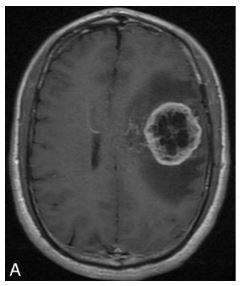

35.74988492484025 original


In [976]:
[image_s, fit_s] = fitness(np.arange(256) * 1)
display(Image.fromarray(image_s.astype('uint8')))
print(fit_s, 'original')

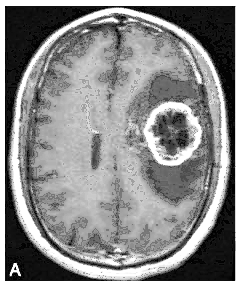

47.943982607260956 aco + sa


In [977]:
[IMG, FIT] = fitness(enhancement_lut)
display(Image.fromarray(IMG.astype('uint8')))
print(FIT, 'aco + sa')